In [43]:
import numpy as np

import pyvista as pv
from pyvista import examples

In [44]:
from einops import rearrange
import matplotlib.pyplot as plt

In [47]:
points = np.load('/Users/erikstorrs/Downloads/registration_pts/results/xyz.npy')
points.shape

(226560, 4)

In [48]:
points[:10]

array([[ 0,  0,  1,  0],
       [ 1,  0,  1,  0],
       [ 2,  0,  1,  0],
       [ 3,  0,  1,  0],
       [ 4,  0,  1, 14],
       [ 5,  0,  1, 14],
       [ 6,  0,  1, 14],
       [ 7,  0,  1, 14],
       [ 8,  0,  1, 14],
       [ 9,  0,  1, 14]])

In [66]:
np.unique(points[:, -2])

array([ 1,  2, 12, 21])

In [49]:
f = points[points[:, 2]==1]
img = np.zeros((f[:, 1].max() + 1, f[:, 0].max() + 1))
for (x, y, z, c) in f:
    img[y, x] = c

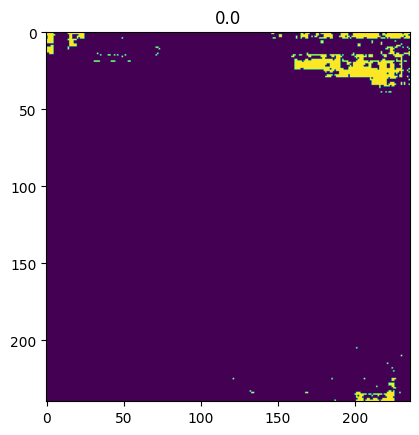

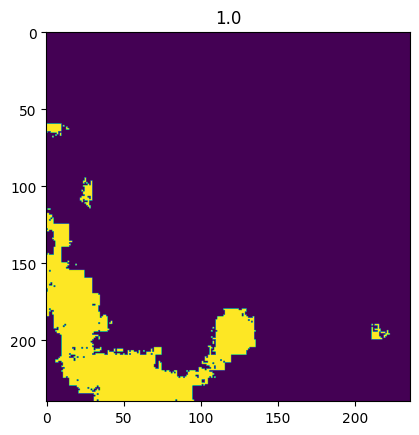

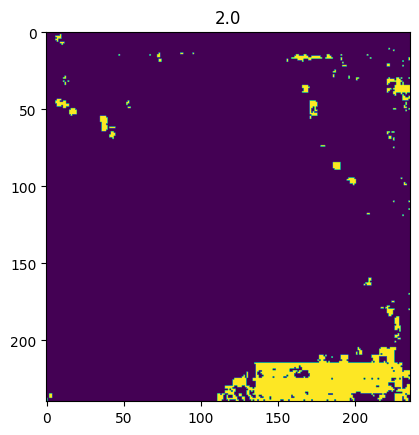

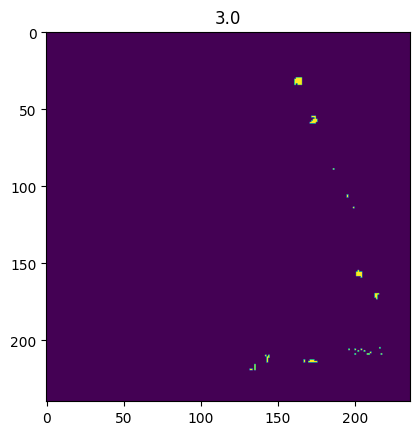

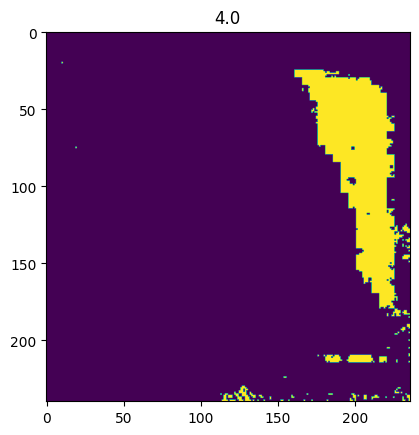

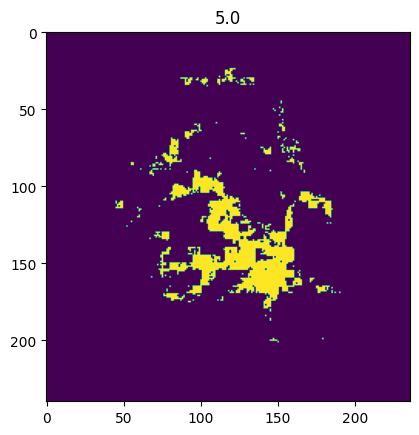

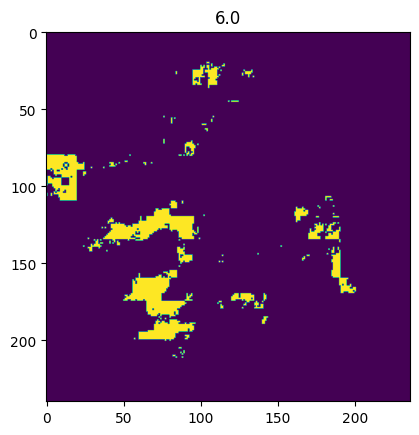

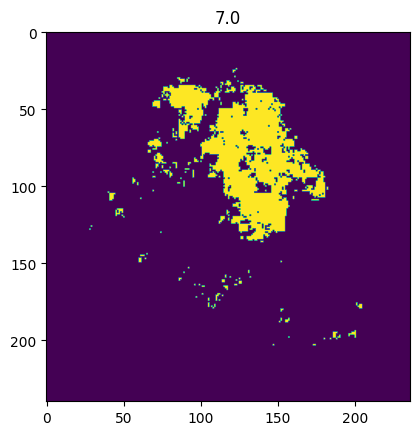

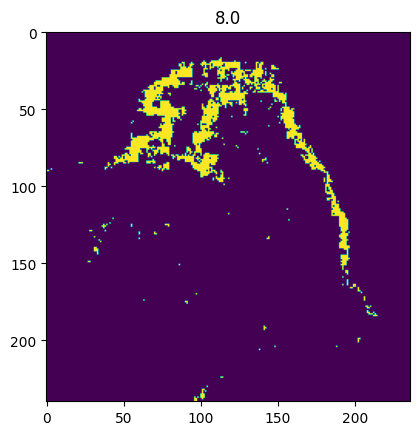

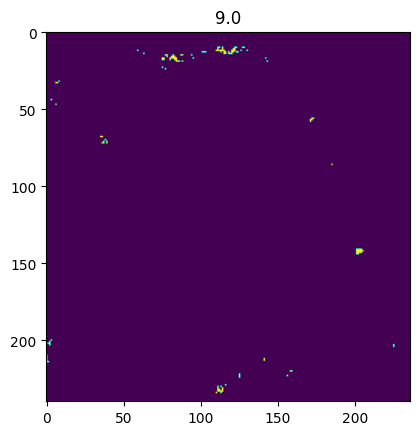

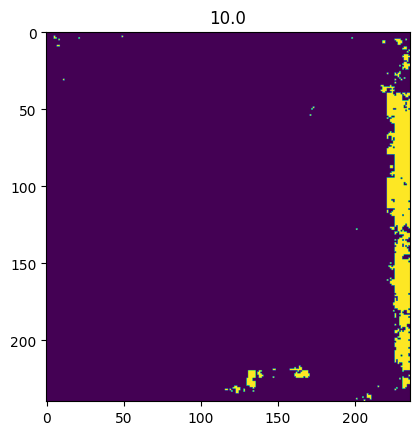

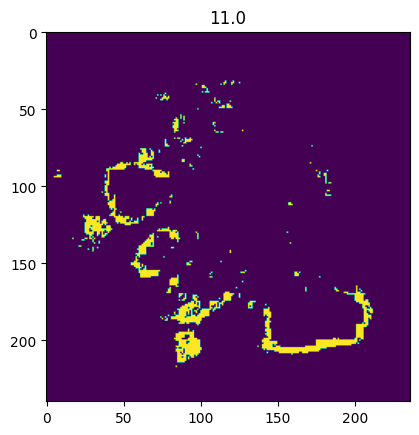

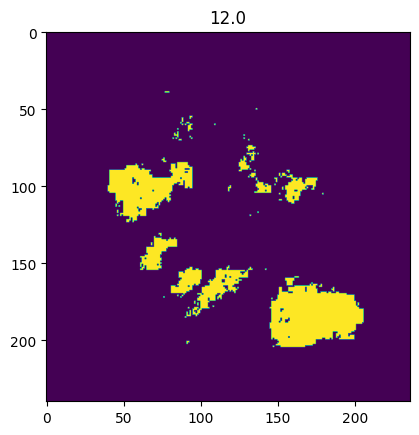

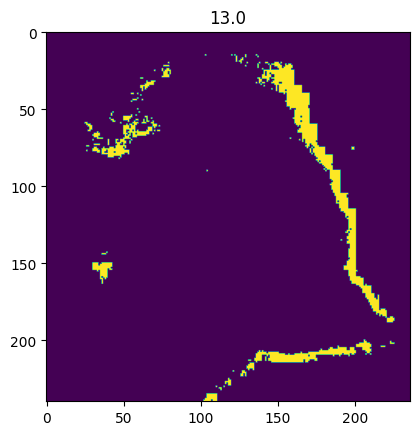

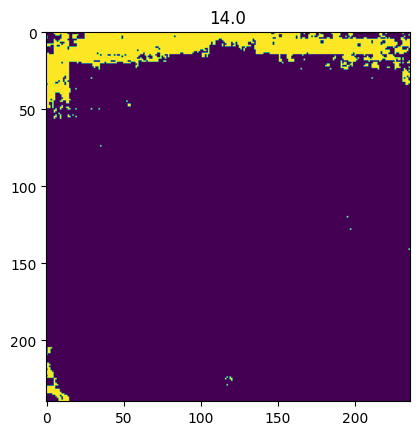

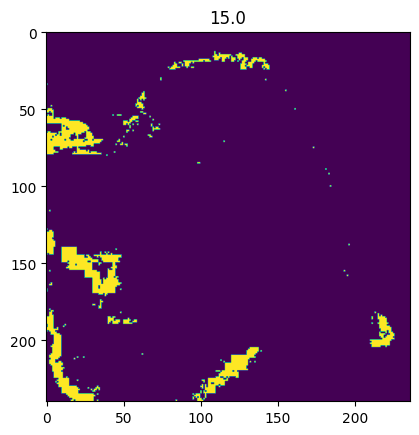

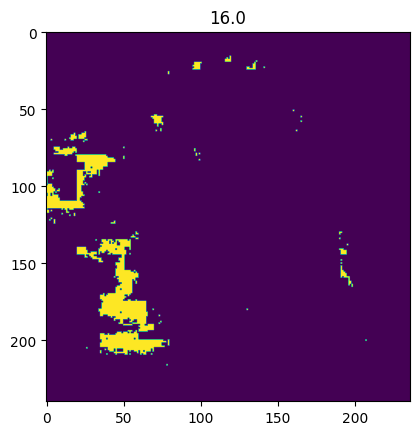

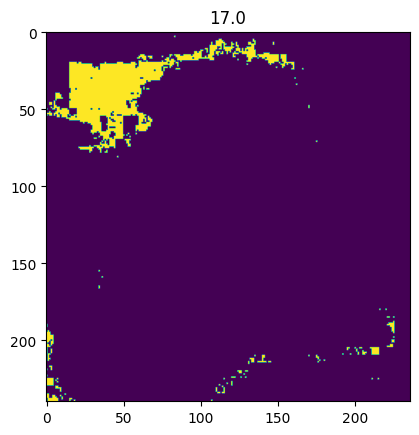

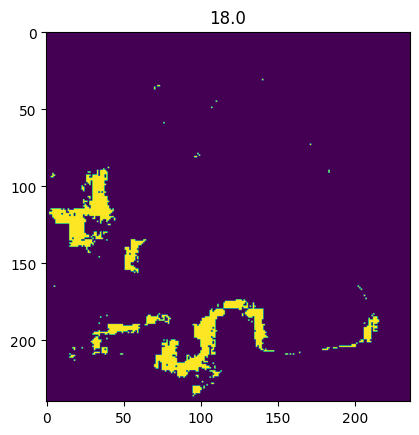

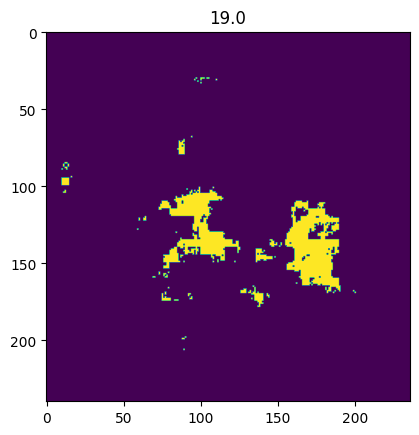

In [50]:
for c in np.unique(img):
    plt.imshow(img==c)
    plt.title(c)
    plt.show()

In [60]:
cluster = 12
pts = points[points[:, -1]==cluster][:, :-1]
pts.shape

(16114, 3)

In [61]:
dataset = pv.PolyData(pts)

/Users/erikstorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/pyvista/utilities/helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [62]:
point_cloud = pv.PolyData(dataset)
point_cloud

PolyData,Information
N Cells,16114
N Points,16114
N Strips,0
X Bounds,"2.600e+01, 2.070e+02"
Y Bounds,"3.200e+01, 2.070e+02"
Z Bounds,"1.000e+00, 2.100e+01"
N Arrays,0


In [63]:
pts[:, -1]

array([ 1,  1,  1, ..., 21, 21, 21])

In [64]:
point_cloud["slice"] = pts[:, -1]

In [65]:
point_cloud.plot(render_points_as_spheres=True)

Widget(value="<iframe src='http://localhost:52772/index.html?ui=P_0x2d2c11ab0_8&reconnect=auto' style='width: …

 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions


In [69]:
pts = points[:, :-1]
point_cloud = pv.PolyData(pts)
point_cloud["cluster"] = points[:, -1]

/Users/erikstorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/pyvista/utilities/helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [79]:
plotter = pv.Plotter()
for i, c in enumerate(np.unique(img)):
    pts = points[points[:, -1]==c][:, :-1]
    point_cloud = pv.PolyData(pts)
    plotter.add_mesh(point_cloud, color=sns.color_palette('tab20')[i], point_size=2.0, render_points_as_spheres=True)

/Users/erikstorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/pyvista/utilities/helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [80]:
# plotter.show_grid()
plotter.show()

Widget(value="<iframe src='http://localhost:52772/index.html?ui=P_0x30dffe650_16&reconnect=auto' style='width:…

In [94]:
extended = sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c')

plotter = pv.Plotter()
for i, c in enumerate([7, 11, 12]):
    pts = points[points[:, -1]==c][:, :-1]
    point_cloud = pv.PolyData(pts)
    plotter.add_mesh(point_cloud, color=extended[i], point_size=3.0, render_points_as_spheres=True)
# plotter.show_grid()
plotter.show()

/Users/erikstorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/pyvista/utilities/helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value="<iframe src='http://localhost:52772/index.html?ui=P_0x3141c41c0_29&reconnect=auto' style='width:…

 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions
 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions


In [81]:
sns.color_palette('tab20')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [9]:
# Define some helpers - ignore these and use your own data!
def generate_points(subset=0.02):
    """A helper to make a 3D NumPy array of points (n_points by 3)"""
    dataset = examples.download_lidar()
    ids = np.random.randint(low=0, high=dataset.n_points - 1, size=int(dataset.n_points * subset))
    return dataset.points[ids]


points = generate_points()
# Print first 5 rows to prove its a numpy array (n_points by 3)
# Columns are (X Y Z)
points[0:5, :]

pyvista_ndarray([[4.81043975e+05, 4.40007890e+06, 1.76943994e+03],
                 [4.81005475e+05, 4.40015550e+06, 1.76078003e+03],
                 [4.81069975e+05, 4.40014700e+06, 1.77232996e+03],
                 [4.81057575e+05, 4.40012780e+06, 1.76025000e+03],
                 [4.80969575e+05, 4.40010970e+06, 1.76317004e+03]])

In [10]:
points.shape

(67841, 3)

In [11]:
point_cloud = pv.PolyData(points)
point_cloud

PolyData,Information
N Cells,67841
N Points,67841
N Strips,0
X Bounds,"4.809e+05, 4.811e+05"
Y Bounds,"4.400e+06, 4.400e+06"
Z Bounds,"1.754e+03, 1.785e+03"
N Arrays,0


In [12]:
np.allclose(points, point_cloud.points)

True

In [13]:
point_cloud.plot(eye_dome_lighting=True)

Widget(value="<iframe src='http://localhost:52772/index.html?ui=P_0x172389e10_2&reconnect=auto' style='width: …